In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [2]:
rip_mono = open_file(string(res_path, "\\G-2021-03_qp_mono.jld2"));
rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_qp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_qp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_qp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_qp.jld2"));
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_qp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_qp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_qp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_qp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_qp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_qp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_qp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_qp.jld2")); # r, γ =  T(0.95), T(0.1)

In [3]:
stats_qp = Dict(
                # :ripqp_mono        => rip_mono,
                :ripqp_mono1       => rip_mono1,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
                :ripqp_mono_d1   => rip_mono_d1,
                # :ripqp_mono_c1   => rip_mono_c1,
                :rip_monoK251    => rip_monoK251,
                :rip_mono_dK251  => rip_mono_dK251,
                :rip_monoosK251 => rip_monoosK251,
                )

Dict{Symbol,DataFrame} with 5 entries:
  :ripqp_mono1    => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoosK251 => 123×31 DataFrame. Omitted printing of 24 columns…
  :ripqp_mono_d1  => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_mono_dK251 => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoK251   => 123×31 DataFrame. Omitted printing of 24 columns…

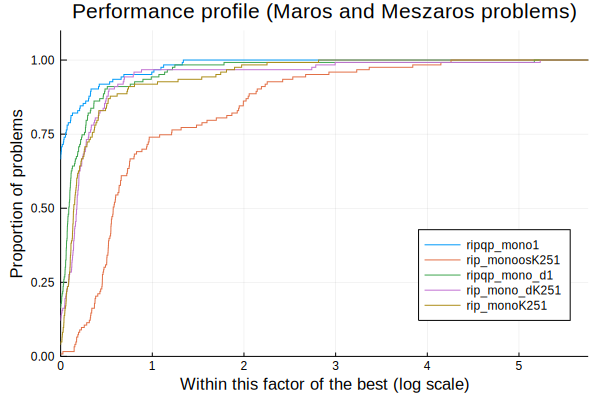

In [4]:
perf = performance_profile(stats_qp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [5]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1bis   => rip_mono1bis,
                :rip_monoosK251 => rip_monoosK251,
                :rip_monoosK252 => rip_monoosK252,
                )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_mono1bis   => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoosK251 => 123×31 DataFrame. Omitted printing of 24 columns…

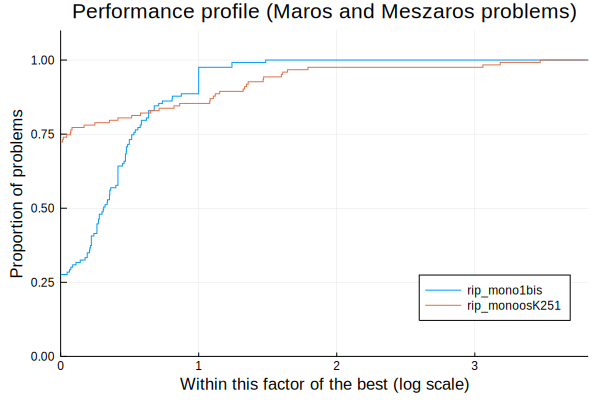

In [6]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")